# Ejercicion de programación - Regresión Logistica

Universitarios:  
- Romero Taboada Luis Fernando
- Barañado Mendez Alexander Nahuel

In [245]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np
import pandas as pd

# Librerias para graficar
from matplotlib import pyplot
import matplotlib.pyplot as plt

# Separacion del Dataset 30% y 70%
from sklearn.model_selection import train_test_split

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline

## 1 Regresion Logistica

La siguiente celda cargará los datos y las etiquetas correspondientes:

In [247]:
# Cargar datos
data = pd.read_csv('/content/drive/MyDrive/datasets/MisDatasets/mushroom_cleaned.csv')

# Variables de Entrada del dataset
X = data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height',
          'stem-width', 'stem-color', 'season']]

# Variables de Salida del dataset
y = data['class']

# Muestra el tamaño de "y"
m = y.size


print(X)
print(y)
print(m)

       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
0              1372          2                2          10     3.807467   
1              1461          2                2          10     3.807467   
2              1371          2                2          10     3.612496   
3              1261          6                2          10     3.787572   
4              1305          6                2          10     3.711971   
...             ...        ...              ...         ...          ...   
54030            73          5                3           2     0.887740   
54031            82          2                3           2     1.186164   
54032            82          5                3           2     0.915593   
54033            79          2                3           2     1.034963   
54034            72          5                3           2     1.158311   

       stem-width  stem-color    season  
0            1545          11  1.804273  
1  

# Dividimos los datos que seran 30% para pruebas y 70% para entrenamiento

In [248]:
# Dividiendo los datos en conjuntos de entrenamiento y prueba
train_data, test_data = train_test_split(data, test_size=0.3, random_state=42)

# Dividimos los datos para X_test y y_test donde serán los datos para la prueba
X_test = test_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height',
                    'stem-width', 'stem-color', 'season']]
y_test = test_data['class']

# Dividimos los datos para X_train y y_train para el entrenamiento
X_train = train_data[['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color', 'stem-height',
                      'stem-width', 'stem-color', 'season']]
y_train = train_data['class']

# Mostramos los datos que serán para el entrenamiento
print("Datos de X_train:")
print(X_train)
print("Datos de y_train:")
print(y_train)

# Mostramos la cantidad de ejemplos que tienen X_train y y_train
print('-' * 70)
print("El 70% de ejemplos que serán para el entrenamiento son: {:.0f}".format(len(train_data)))
print("El 30% de ejemplos que serán para el test son: {:.0f}".format(len(test_data)))


Datos de X_train:
       cap-diameter  cap-shape  gill-attachment  gill-color  stem-height  \
21328           605          6                6          11     0.317893   
30616           320          2                5           7     0.979257   
9739            171          0                0           3     0.247123   
13132           705          6                0           5     0.055280   
42115            89          6                0           4     0.883761   
...             ...        ...              ...         ...          ...   
11284           284          0                0           3     0.235186   
44732           973          6                4           6     1.328557   
38158            88          0                0           5     0.720623   
860            1276          2                0          10     2.343199   
15795           765          2                5          11     1.050027   

       stem-width  stem-color    season  
21328        1467          

### 1.1 Visualizar los datos

Antes de comenzar a implementar cualquier algoritmo de aprendizaje, siempre es bueno visualizar los datos si es posible. Mostramos los datos en una gráfica bidimensional llamando a la función `plotData`. Se completará el código en `plotData` para que muestre una figura donde los ejes son los dos puntajes de los dos examenes, los ejemplos positivos y negativos se muestran con diferentes marcadores.

In [249]:
def graficarDatosDeHongos(X_train, y_train):
    # Crear una nueva figura
    fig = plt.figure()

    # Encontrar los índices de los ejemplos comestibles y venenosos
    Comestible = y == 0
    Venenoso = y == 1

    # Graficar los ejemplos comestibles y venenosos usando .loc para indexar correctamente
    pyplot.plot(X.loc[Comestible, 'cap-diameter'], X.loc[Comestible, 'stem-height'], 'k*', lw=2, ms=10, label='Comestible')
    pyplot.plot(X.loc[Venenoso, 'cap-diameter'], X.loc[Venenoso, 'stem-height'], 'ko', mfc='y', ms=8, mec='k', mew=1, label='Venenoso')
    pyplot.xlabel('Diámetro de la tapa')
    pyplot.ylabel('Altura del tallo')
    pyplot.legend(loc='best')
    pyplot.show()

Se llama a la función implementada para mostrar los datos cargados:

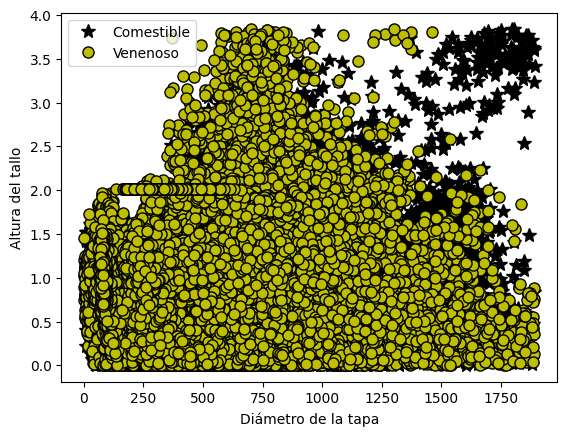

In [250]:
graficarDatosDeHongos(X_train, y_train)

<a id="section1"></a>
### 1.2 Implementacion

#### 1.2.1 Fución Sigmoidea


Los resultados que debe generar la funcion sigmoidea para valores positivos amplios de `x`, deben ser cercanos a 1, mientras que para valores negativos grandes, la sigmoide debe generar valores cercanos 0. La evaluacion de `sigmoid(0)` debe dar un resultado exacto de 0.5. Esta funcion tambien debe poder trabajar con vectores y matrices.

In [251]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la intrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

Se calcula el valor de la sigmoide aplicando la funcion sigmoid con `z=0`, se debe obtener un resultado de 0.5. RE recomienda experimentar con otros valores de `z`.

In [252]:
# Prueba la implementacion de la funcion sigmoid
z = [0, 0.5, 1]
g = sigmoid(z)
print('g(', z, ') = ', g)

g( [0, 0.5, 1] ) =  [0.5        0.62245933 0.73105858]


<a id="section2"></a>
#### 1.2.2 Función de Costo y Gradiente

Se implementa la funcion cost y gradient, para la regresión logistica. Antes de continuar es importante agregar el termino de intercepcion a X.

In [253]:
# Configurar la matriz adecuadamente, y agregar una columna de unos que corresponde al termino de intercepción.
m, n = X_train.shape
print(f'Numero de Columnas: {n}')
print(f'Numero de Filas: {m}')
# Agraga el termino de intercepción a A
X_ready = np.concatenate([np.ones((m, 1)), X_train], axis=1)

Numero de Columnas: 8
Numero de Filas: 37824


Realizamos la funcion de costo en una regresión logistica

In [254]:
def calcularCosto(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X.dot(theta.T))
    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))

    return J

Realizamos una funcion para el descenso por pa gradiente

In [255]:
def descensoGradiente(theta, X, y, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X.dot(theta.T))
        theta = theta - (alpha / m) * (h - y).dot(X)

        J_history.append(calcularCosto(theta, X, y))
    return theta, J_history

theta calculado por el descenso por el gradiente: [ 3.17753298e-05  6.08612403e-04  4.41981103e-05  4.00280525e-05
  1.66147147e-04  5.98783955e-05 -3.36736341e-04  1.50846520e-04
  2.25474587e-05]
Probabilidad de ser comestible: 0.579


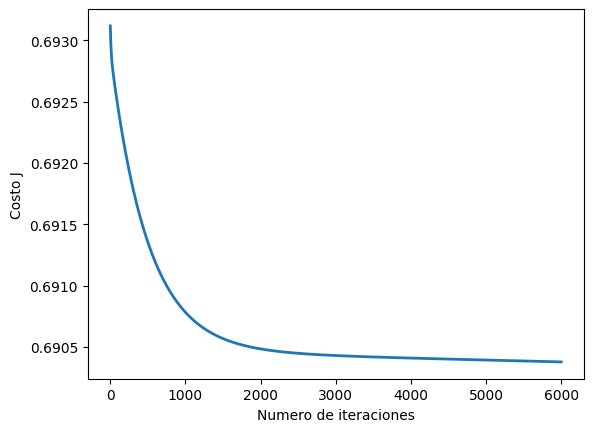

In [256]:
# Elegir algun valor para alpha (probar varias alternativas)
alpha = 0.0000001
num_iters = 6000

# inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(1+n)
theta, J_history = descensoGradiente(theta, X_ready, y_train, alpha, num_iters)

# Grafica la convergencia del costo
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

# Muestra los resultados del descenso por el gradiente
print('theta calculado por el descenso por el gradiente: {:s}'.format(str(theta)))

# verificar si ingresa o no a la universidad
X_array = [1, 1372, 2, 2, 10, 3.8074667544799388, 1545, 11, 1.8042727086281731]
comestible = sigmoid(np.dot(X_array, theta))   # Se debe cambiar esto

print(f'Probabilidad de ser comestible: {comestible:.3f}')

In [257]:
X_array = [1, 1372, 2, 2, 10, 3.8074667544799388, 1545, 11, 1.8042727086281731]
y_predicted = sigmoid(np.dot(X_array, theta))
print('Probabilidad de ser comestible:{:.0f}'.format(y_predicted))

Probabilidad de ser comestible:1


In [258]:
def costFunction(theta, X, y):
    # Inicializar algunos valores utiles
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X.dot(theta.T))

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    grad = (1 / m) * (h - y).dot(X)

    return J, grad

Se prueba la funcion `costFunction` utilizando dos casos de prueba para $\theta$.

In [259]:
# Inicializacion de parametros de ajuste
initial_theta = np.zeros(n+1)
print(initial_theta)
cost, grad = costFunction(initial_theta, X_ready, y_train)

print('Costo en theta inicial (zeros): {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.693\n')
print(grad)
print('Gradiente en theta inicial (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[-0.1000, -12.0092, -11.2628]\n')



[0. 0. 0. 0. 0. 0. 0. 0. 0.]
Costo en theta inicial (zeros): 0.693
Costo esperado (aproximado): 0.693

[-0.05025909  0.73601417 -0.05631345 -0.05070854 -0.26487151 -0.09825278
 17.31279082 -0.21843274 -0.0359162 ]
Gradiente en theta inicial (zeros):
	[-0.0503, 0.7360, -0.0563]
Gradiente esperado (aproximado):
	[-0.1000, -12.0092, -11.2628]



In [260]:
# Calcula y muestra el costo y el gradiente con valores de theta diferentes a cero

test_theta = np.array([-24, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2, 0.2])
#test_theta = np.array([-11.74749157, 0.09927308, 0.09316497])
print(test_theta)
cost, grad = costFunction(test_theta, X_ready, y_train)

print('Costo en theta prueba: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.218\n')

print('Gradiente en theta prueba:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Gradiente esperado (aproximado):\n\t[0.043, 2.566, 2.647]')

[-24.    0.2   0.2   0.2   0.2   0.2   0.2   0.2   0.2]
Costo en theta prueba: nan
Costo esperado (aproximado): 0.218

Gradiente en theta prueba:
	[0.427, 284.160, 1.832]
Gradiente esperado (aproximado):
	[0.043, 2.566, 2.647]


<ipython-input-258-e3041c0335d8>:10: RuntimeWarning: divide by zero encountered in log
  J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))


#### 1.2.3 Parámetros de aprendizaje usando `scipy.optimize`


A continuación, se tiene el código para llamar a `optimize.minimize` con los argumentos correctos.

In [261]:
# Establecer las opciones para optimize.minimize
options= {'maxiter': 1000}

# revisar la documentacion de scipy's optimize.minimize para mayor descripcion de los parametros
# La funcion devuekve un objeto `OptimizeResult`
# Se utiliza el algoritmo de Newton truncado para la optimización.
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X_ready, y_train),
                        jac=True,
                        method='TNC',
                        options=options)

# la propiedad fun del objeto devuelto por `OptimizeResult`
# contiene el valor del costFunction de un theta optimizado
cost = res.fun

# Theta optimizada esta en la propiedad x
theta = res.x

# Imprimir theta en la pantalla
print('Costo con un valor de theta encontrado por optimize.minimize: {:.3f}'.format(cost))
print('Costo esperado (aproximado): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Theta esperado (aproximado):\n\t[-25.161, 0.206, 0.201]')

<ipython-input-261-a385eb493972>:7: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


Costo con un valor de theta encontrado por optimize.minimize: 0.636
Costo esperado (aproximado): 0.203

theta:
	[1.640, -0.000, -0.090]
Theta esperado (aproximado):
	[-25.161, 0.206, 0.201]


<a id="section4"></a>
#### 1.2.4 Evaluación de la regresión logistica

Después de aprender los parámetros, se puede usar el modelo para predecir si un estudiante en particular será admitido. Para un estudiante con una puntuación en el Examen 1 de 45 y una puntuación en el Examen 2 de 85, debe esperar ver una probabilidad de admisión de 0,776. Otra forma de evaluar la calidad de los parámetros que hemos encontrado es ver qué tan bien predice el modelo aprendido en nuestro conjunto de entrenamiento.

In [262]:
def predict(theta, X):
    """
    Predecir si la etiqueta es 0 o 1 mediante regresión logística aprendida.
    Calcula las predicciones para X usando un umbral en 0.5 (es decir, si sigmoide (theta.T * x)> = 0.5, predice 1)

    Parametros
    ----------
    theta : array_like
        Parametros para regresion logistica. Un vecto de la forma (n+1, ).

    X : array_like
        Datos utilizados para el calculo de las predicciones.
        La fila es el numero de los puntos para calcular las predicciones,
        y las columnas con el numero de caracteristicas.

    Devuelve
    -------
    p : array_like
        Predicciones y 0 o 1 para cada fila en X.
    """
    m = X.shape[0] # Numero de ejemplo de entrenamiento

    p = np.zeros(m)

    p = np.round(sigmoid(X.dot(theta.T)))
    return p

Una vez entrenado el modelo se procede a realizar la prediccion y evaluación de los resultados de predecir cual es el valor que vota el modelo para todos los datos utilizados en el entrenamiento.

In [264]:
#  Predice la probabilidad de ingreso para un estudiante con nota de 45 en el examen 1 y nota de 85 en el examen 2
# prob = sigmoid(np.dot([1, 45, 85], theta))
# print('Para un estudiante con notas de 45 y 85, se predice una probabilidad de admisión de: {:.3f}%'.format(prob))
# print('Valor esperado: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X_ready)
print('Precisión de entrenamiento: {:.2f} %'.format(np.mean(p == y_train) * 100))

Precisión de entrenamiento: 63.51 %
